# SARIMA Model for Forecasting:

Rain Forecast done to SARIMA model.
This notebook describes forecasting using time series models in statsmodels.
Note: this notebook applies only to the state space model classes, which are:

sm.tsa.SARIMAX

sm.tsa.UnobservedComponents

sm.tsa.VARMAX

sm.tsa.DynamicFactor

In [ ]:
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/weatherpreprocess.csv')

In [ ]:
Arim_df=df[['TIMESTAMP','M_RAIN_PERCENTAGE']]

In [ ]:
Arim_df

,TIMESTAMP,M_RAIN_PERCENTAGE
0,1970-01-20 00:12:41.520,1.147212
1,1970-01-20 00:12:41.520,1.147212
2,1970-01-20 00:12:41.520,1.147212
3,1970-01-20 00:12:41.520,1.147212
4,1970-01-20 00:12:41.520,1.147212
...,...,...
3572323,1970-01-20 00:11:28.491,0.000000
3572324,1970-01-20 00:11:28.491,0.000000
3572325,1970-01-20 00:11:28.491,0.000000
3572326,1970-01-20 00:11:28.491,0.000000


In [ ]:
Arim_df.set_index('TIMESTAMP',inplace=True)

A simple example is to use an AR(1) model to forecast inflation. Before forecasting, let’s take a look at the series:

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


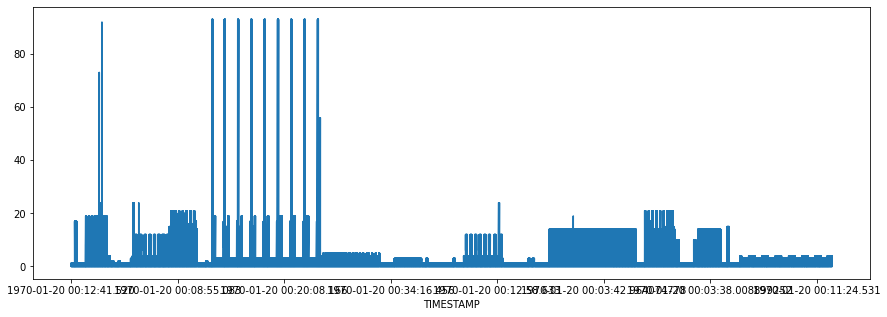

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


endog = Arim_df['M_RAIN_PERCENTAGE']
endog.plot(figsize=(15, 5))

**Constructing and estimating the model**
The next step is to formulate the econometric model that we want to use for forecasting. In this case, we will use an AR(1) model via the SARIMAX class in statsmodels.

After constructing the model, we need to estimate its parameters. This is done using the fit method. The summary method produces several convenient tables showing the results.

In [ ]:
# Construct the model
mod = sm.tsa.SARIMAX(endog, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

#print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
# The default is to get a one-step-ahead forecast:
#print(res.forecast())

In [ ]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast()

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
#print(fcast_res1.summary_frame(alpha=0.10))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


**Plotting the data, forecasts, and confidence intervals**
Often it is useful to plot the data, the forecasts, and the confidence intervals. There are many ways to do this, but here’s one example
**Forecast of rain in 11 hrs 28 mts 491 seconds**

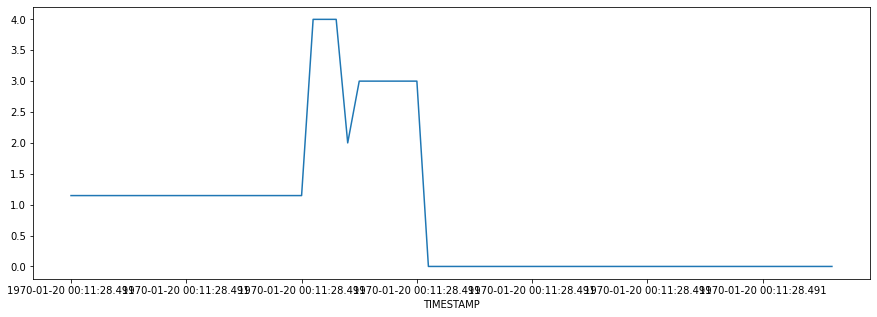

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
endog.loc['1970-01-20 00:11:28.491':].plot(ax=ax)

# Construct the forecasts
#fcast = res.get_forecast('1970-01-20 00:12:41.491').summary_frame()
#fcast['mean'].plot(ax=ax, style='k--')
#ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

In [ ]:
# Step 1: fit model parameters w/ training sample
training_obs = int(len(endog) * 0.8)

training_endog = endog[:training_obs]
training_mod = sm.tsa.SARIMAX(
    training_endog, order=(1, 0, 0), trend='c')
training_res = training_mod.fit()

# Print the estimated parameters
print(training_res.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


intercept    0.285892
ar.L1        0.763712
sigma2       3.924688
dtype: float64


In [ ]:
endog

TIMESTAMP
1970-01-20 00:12:41.520    1.147212
1970-01-20 00:12:41.520    1.147212
1970-01-20 00:12:41.520    1.147212
1970-01-20 00:12:41.520    1.147212
1970-01-20 00:12:41.520    1.147212
                             ...   
1970-01-20 00:11:28.491    0.000000
1970-01-20 00:11:28.491    0.000000
1970-01-20 00:11:28.491    0.000000
1970-01-20 00:11:28.491    0.000000
1970-01-20 00:11:28.491    0.000000
Name: M_RAIN_PERCENTAGE, Length: 3572328, dtype: float64